# Исследование данных о продажах компьютерных игр

**Задание**<br>
* На основе имеющихся данных выявить определяющие успешность игры закономерности, и выбрать наиболее перспективные направления для продвижения.<br>
* Составить портреты пользователей по регионам.<br>
* Статистически проверить следующие гипотезы:
    * средние пользовательские рейтинги платформ Xbox One и PC одинаковые
    * средние пользовательские рейтинги жанров Action и Sports одинаковые
<br><br>

**Описание данных**
* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — возрастной рейтинг от организации ESRB


### Загрузка библиотек, данных, изучение общей информации

In [139]:
import pandas as pd
import numpy as np
from scipy import stats as st

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [140]:
pd.options.display.float_format = "{:.2f}".format

In [141]:
data = pd.read_csv('/datasets/games.csv')

In [142]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.00,Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,1985.00,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.00,Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,2009.00,Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.00,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [143]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


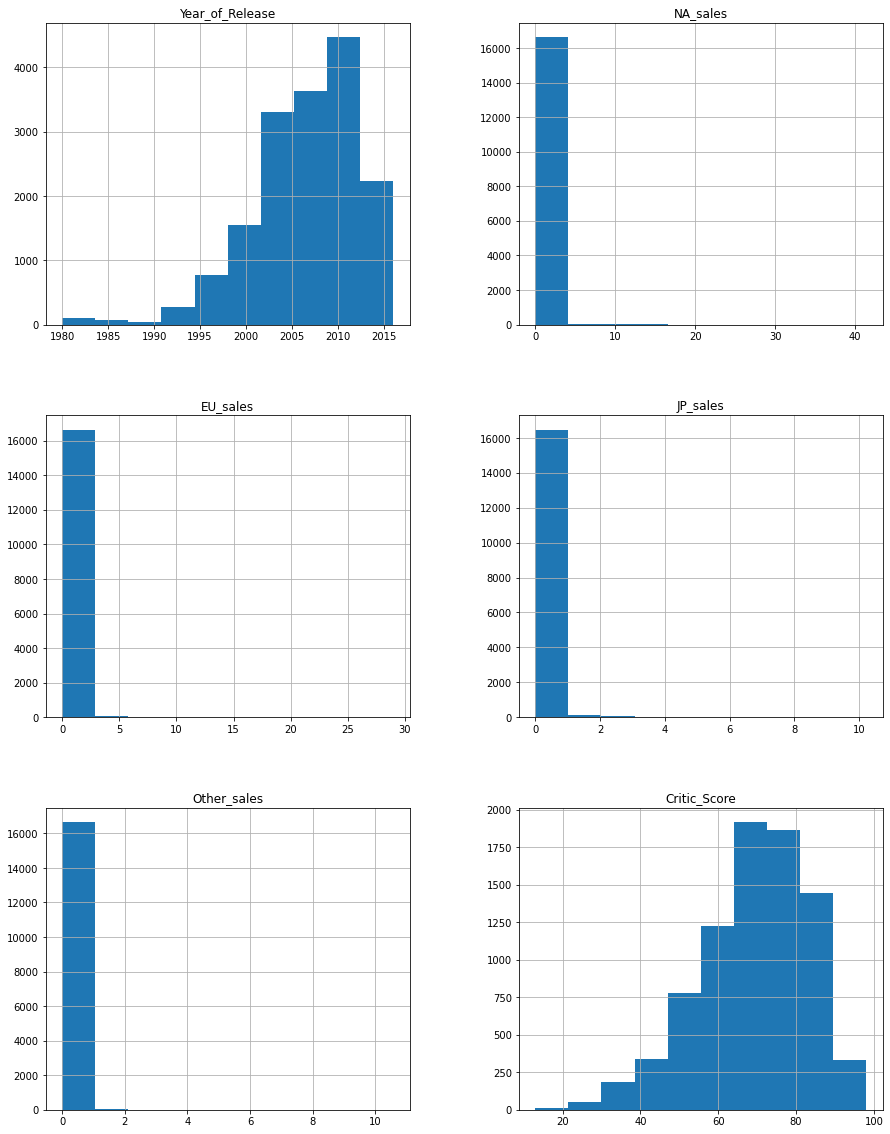

In [144]:
data.hist(figsize=(15, 20))
pass

### Знакомство с содержимым и предобработка

Нормализуем названия столбцов

In [145]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [146]:
data.columns = data.columns.str.lower() 

In [147]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Рассмотрим по отдельности каждый столбец датафрейма.

#### name — название игры

In [148]:
data['name'].value_counts()

Need for Speed: Most Wanted             12
Madden NFL 07                            9
LEGO Marvel Super Heroes                 9
FIFA 14                                  9
Ratatouille                              9
                                        ..
Mario & Luigi: Bowser's Inside Story     1
Kamiwaza                                 1
DriveClub                                1
Sumikko Gurashi: Mura o Tsukurundesu     1
God of War                               1
Name: name, Length: 11559, dtype: int64

In [149]:
data['name'].describe()

count                           16713
unique                          11559
top       Need for Speed: Most Wanted
freq                               12
Name: name, dtype: object

Посмотрим, что за повторы, на примере наиболее часто встречающегося значения:

In [150]:
data.query('name == "Need for Speed: Most Wanted"').sort_values(by='year_of_release')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005.00,Racing,2.03,1.79,0.08,0.47,82.00,9.1,T
1591,Need for Speed: Most Wanted,X360,2005.00,Racing,1.00,0.13,0.02,0.10,83.00,8.5,T
1998,Need for Speed: Most Wanted,XB,2005.00,Racing,0.53,0.46,0.00,0.05,83.00,8.8,T
3581,Need for Speed: Most Wanted,GC,2005.00,Racing,0.43,0.11,0.00,0.02,80.00,9.1,T
5972,Need for Speed: Most Wanted,PC,2005.00,Racing,0.02,0.23,0.00,0.04,82.00,8.5,T
6410,Need for Speed: Most Wanted,DS,2005.00,Racing,0.24,0.01,0.00,0.02,45.00,6.1,E
6473,Need for Speed: Most Wanted,GBA,2005.00,Racing,0.19,0.07,0.00,0.00,NaN,8.3,E
523,Need for Speed: Most Wanted,PS3,2012.00,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012.00,Racing,0.62,0.78,0.01,0.15,83.00,8.5,T
2048,Need for Speed: Most Wanted,PSV,2012.00,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN


Название - одно, игр - две, годов выпуска - три.<br>
Но кажется, это не помешает достижению целей исследования.

In [151]:
data.groupby('name')['year_of_release'].count()

name
 Beyblade Burst                 1
 Fire Emblem Fates              1
 Frozen: Olaf's Quest           2
 Haikyu!! Cross Team Match!     1
 Tales of Xillia 2              1
                               ..
thinkSMART: Chess for Kids      1
uDraw Studio                    1
uDraw Studio: Instant Artist    2
wwe Smackdown vs. Raw 2006      0
¡Shin Chan Flipa en colores!    1
Name: year_of_release, Length: 11559, dtype: int64

Некоторые названия начинаются с пробела, уберем их:

In [152]:
data['name'] = data['name'].str.strip()

In [153]:
data[data['name'].astype(str).str[0] == ' ']['name'].count()

0

Рассмотрим пропуски:

In [154]:
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.00,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.00,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Что-то неизвестное, неизвестного жанра...<br>
Возможно, дополнит общую статистику 1993 года.

#### platform — платформа

In [155]:
data['platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
WS         6
SCD        6
3DO        3
TG16       2
GG         1
PCFX       1
Name: platform, dtype: int64

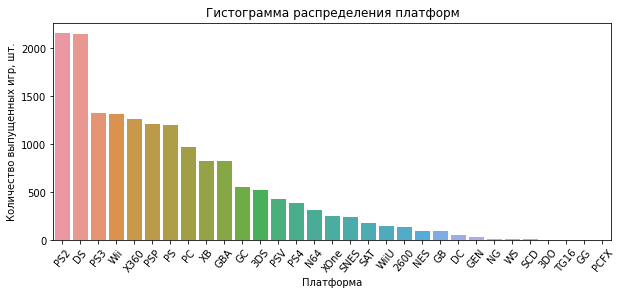

In [156]:
graph = sns.barplot(x=data['platform'].value_counts().index,
                    y=data['platform'].value_counts())
graph.set(title='Гистограмма распределения платформ')
graph.set_xlabel('Платформа')
graph.set_ylabel('Количество выпущенных игр, шт.')
plt.xticks(rotation=50)
graph.figure.set_figwidth(10)

#### year_of_release — год выпуска

Сразу преобразуем значения в целочисленные:

In [157]:
data['year_of_release'] = data['year_of_release'].astype('Int16')

In [158]:
data['year_of_release'].value_counts(dropna=False).sort_index(ascending=False)

2016     502
2015     606
2014     581
2013     544
2012     653
2011    1136
2010    1255
2009    1426
2008    1427
2007    1197
2006    1006
2005     939
2004     762
2003     775
2002     829
2001     482
2000     350
1999     338
1998     379
1997     289
1996     263
1995     219
1994     121
1993      62
1992      43
1991      41
1990      16
1989      17
1988      15
1987      16
1986      21
1985      14
1984      14
1983      17
1982      36
1981      46
1980       9
NaN      269
Name: year_of_release, dtype: Int64

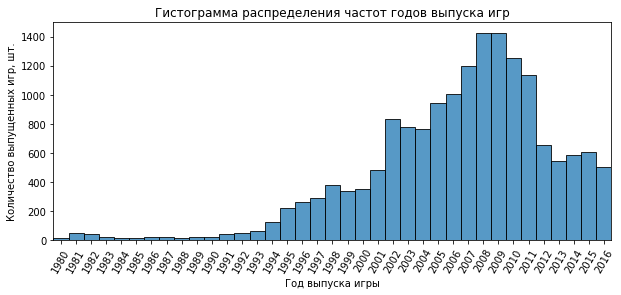

In [159]:
graph = sns.histplot(data=data, x='year_of_release', discrete=True)
graph.set(title='Гистограмма распределения частот годов выпуска игр')
graph.set_xlabel('Год выпуска игры')
graph.set_ylabel('Количество выпущенных игр, шт.')
plt.xticks(rotation=60)
graph.xaxis.set_major_locator(ticker.MultipleLocator(1))
graph.figure.set_figwidth(10)
graph.set_xlim(1980-0.5, 2016+0.5)
pass

#### genre — жанр игры

In [160]:
data['genre'].value_counts(dropna=False)

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
NaN                2
Name: genre, dtype: int64

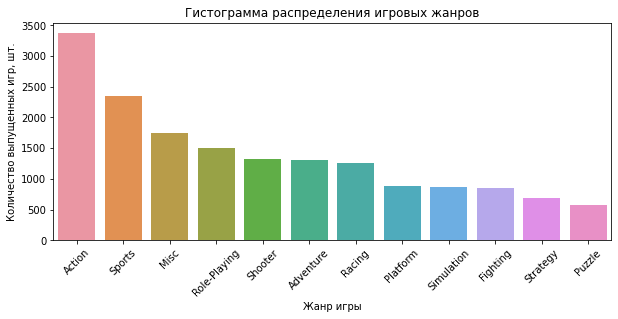

In [161]:
graph = sns.barplot(x=data['genre'].value_counts().index,
                    y=data['genre'].value_counts())
graph.set(title='Гистограмма распределения игровых жанров')
graph.set_xlabel('Жанр игры')
graph.set_ylabel('Количество выпущенных игр, шт.')
plt.xticks(rotation=45)
graph.figure.set_figwidth(10)

#### na_sales — продажи в Северной Америке (миллионы проданных копий)

In [162]:
data['na_sales'].describe()

count   16715.00
mean        0.26
std         0.81
min         0.00
25%         0.00
50%         0.08
75%         0.24
max        41.36
Name: na_sales, dtype: float64

Рассмотрим только положительные значения:

In [163]:
data.query('na_sales > 0')['na_sales'].describe()

count   12207.00
mean        0.36
std         0.93
min         0.01
25%         0.06
50%         0.14
75%         0.34
max        41.36
Name: na_sales, dtype: float64

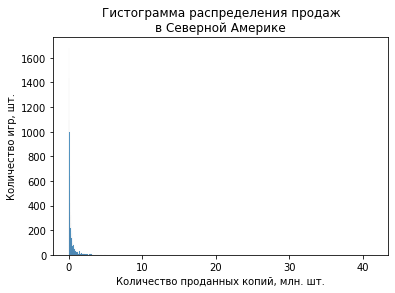

In [164]:
graph = sns.histplot(data=data.query('na_sales > 0'), x='na_sales')
graph.set(title='Гистограмма распределения продаж\nв Северной Америке')
graph.set_xlabel('Количество проданных копий, млн. шт.')
graph.set_ylabel('Количество игр, шт.')
pass

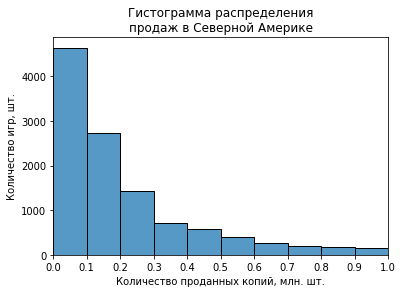

In [165]:
graph = sns.histplot(data=data.query('0 < na_sales < 1'), x='na_sales', bins=np.arange(0, 1.1, 0.1))
graph.set(title='Гистограмма распределения\nпродаж в Северной Америке')
graph.set_xlabel('Количество проданных копий, млн. шт.')
graph.set_ylabel('Количество игр, шт.')
graph.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
graph.set_xlim(0, 1)
pass

Игры, топовые по продажам в Северной Америке:

In [166]:
data.sort_values(by='na_sales', ascending=False).head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.00,8,E
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.00,6.3,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.00,8.4,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.00,6.6,E
18,Super Mario World,SNES,1990,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN


#### eu_sales — продажи в Европе (миллионы проданных копий)

In [167]:
data['eu_sales'].describe()

count   16715.00
mean        0.15
std         0.50
min         0.00
25%         0.00
50%         0.02
75%         0.11
max        28.96
Name: eu_sales, dtype: float64

In [168]:
data.query('eu_sales > 0')['eu_sales'].describe()

count   10845.00
mean        0.22
std         0.61
min         0.01
25%         0.02
50%         0.07
75%         0.20
max        28.96
Name: eu_sales, dtype: float64

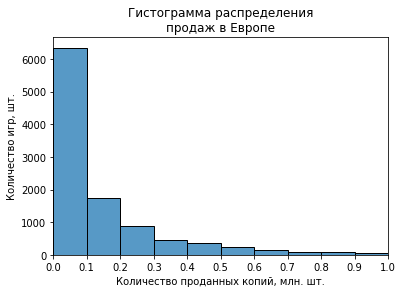

In [169]:
graph = sns.histplot(data=data.query('0 < eu_sales < 1'), x='eu_sales', bins=np.arange(0, 1.1, 0.1))
graph.set(title='Гистограмма распределения\nпродаж в Европе')
graph.set_xlabel('Количество проданных копий, млн. шт.')
graph.set_ylabel('Количество игр, шт.')
graph.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
graph.set_xlim(0, 1)
pass

Игры, топовые по продажам в Европе:

In [170]:
data.sort_values(by='eu_sales', ascending=False).head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.00,8,E
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.00,8,E
19,Brain Age: Train Your Brain in Minutes a Day,DS,2005,Misc,4.74,9.20,4.16,2.04,77.00,7.9,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.00,6.6,E
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.00,8.5,E
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.00,8.2,M
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
15,Wii Fit Plus,Wii,2009,Sports,9.01,8.49,2.53,1.77,80.00,7.4,E


#### jp_sales — продажи в Японии (миллионы проданных копий)

In [171]:
data['jp_sales'].describe()

count   16715.00
mean        0.08
std         0.31
min         0.00
25%         0.00
50%         0.00
75%         0.04
max        10.22
Name: jp_sales, dtype: float64

In [172]:
data.query('jp_sales > 0')['jp_sales'].describe()

count   6201.00
mean       0.21
std        0.48
min        0.01
25%        0.03
50%        0.07
75%        0.19
max       10.22
Name: jp_sales, dtype: float64

В Японии продаж значительно меньше, чем в Северной Америке и Европе.

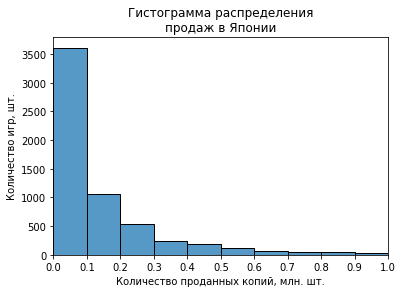

In [173]:
graph = sns.histplot(data=data.query('0 < jp_sales < 1'), x='jp_sales', bins=np.arange(0, 1.1, 0.1))
graph.set(title='Гистограмма распределения\nпродаж в Японии')
graph.set_xlabel('Количество проданных копий, млн. шт.')
graph.set_ylabel('Количество игр, шт.')
graph.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
graph.set_xlim(0, 1)
pass

Игры, топовые по продажам в Японии:

In [174]:
data.sort_values(by='jp_sales', ascending=False).head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.00,8.5,E
20,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN
27,Pokemon Black/Pokemon White,DS,2010,Role-Playing,5.51,3.17,5.65,0.80,NaN,NaN,NaN
25,Pokemon Ruby/Pokemon Sapphire,GBA,2002,Role-Playing,6.06,3.90,5.38,0.50,NaN,NaN,NaN
43,Animal Crossing: Wild World,DS,2005,Simulation,2.50,3.45,5.33,0.86,86.00,8.7,E
26,Brain Age 2: More Training in Minutes a Day,DS,2005,Puzzle,3.43,5.35,5.32,1.18,77.00,7.1,E
215,Monster Hunter Freedom 3,PSP,2010,Role-Playing,0.00,0.00,4.87,0.00,NaN,NaN,NaN


#### other_sales — продажи в других странах (миллионы проданных копий)

In [175]:
data['other_sales'].describe()

count   16715.00
mean        0.05
std         0.19
min         0.00
25%         0.00
50%         0.01
75%         0.03
max        10.57
Name: other_sales, dtype: float64

In [176]:
data.query('other_sales > 0')['other_sales'].describe()

count   10114.00
mean        0.08
std         0.23
min         0.01
25%         0.01
50%         0.02
75%         0.07
max        10.57
Name: other_sales, dtype: float64

В других странах продаж еще меньше, чем в Японии.

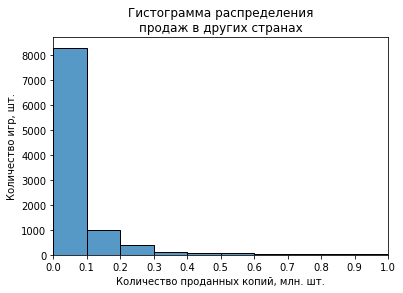

In [177]:
graph = sns.histplot(data=data.query('0 < other_sales < 1'), x='other_sales', bins=np.arange(0, 1.1, 0.1))
graph.set(title='Гистограмма распределения\nпродаж в других странах')
graph.set_xlabel('Количество проданных копий, млн. шт.')
graph.set_ylabel('Количество игр, шт.')
graph.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
graph.set_xlim(0, 1)
pass

Игры, топовые по продажам в других странах:

In [178]:
data.sort_values(by='other_sales', ascending=False).head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
17,Grand Theft Auto: San Andreas,PS2,2004,Action,9.43,0.40,0.41,10.57,95.00,9,M
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.00,8,E
48,Gran Turismo 4,PS2,2004,Racing,3.01,0.01,1.10,7.53,89.00,8.5,E
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.00,8.2,M
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.00,8,E
349,Pro Evolution Soccer 2008,PS2,2007,Sports,0.05,0.00,0.64,2.93,82.00,7.9,E
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.00,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.00,6.6,E
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


#### critic_score — оценка критиков (максимум 100)

In [179]:
data['critic_score'].describe()

count   8137.00
mean      68.97
std       13.94
min       13.00
25%       60.00
50%       71.00
75%       79.00
max       98.00
Name: critic_score, dtype: float64

Преобразуем значения в целочисленные:

In [180]:
data['critic_score'] = data['critic_score'].astype('Int16')

In [181]:
data['critic_score'].value_counts(dropna=False)

NaN    8578
70      256
71      254
75      245
78      240
       ... 
20        3
22        1
21        1
17        1
13        1
Name: critic_score, Length: 83, dtype: Int64

Здесь присутствуют значения NaN.<br>Видимо, не все игры получили оценки критиков.

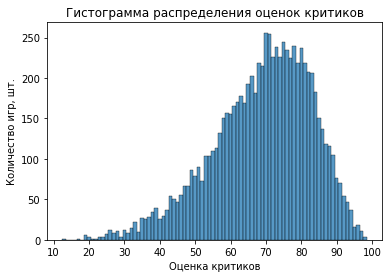

In [182]:
graph = sns.histplot(data=data, x='critic_score', discrete=True)
graph.set(title='Гистограмма распределения оценок критиков')
graph.set_xlabel('Оценка критиков')
graph.set_ylabel('Количество игр, шт.')
graph.xaxis.set_major_locator(ticker.MultipleLocator(10))
pass

#### user_score — оценка пользователей (максимум 10)

In [183]:
data['user_score'].value_counts(dropna=False)

NaN    6701
tbd    2424
7.8     324
8       290
8.2     282
       ... 
1.5       2
0.5       2
0.9       2
9.7       1
0         1
Name: user_score, Length: 97, dtype: int64

Здесь присутствуют значения NaN.<br>Видимо, не все игры получили оценки пользователей.

Заменим отсутствующие значения, записанные как "tbd", на NaN:

In [184]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = np.NaN

In [185]:
data['user_score'].value_counts(dropna=False)

NaN    9125
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.9       2
1.5       2
0.6       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

Оценки пользователей записаны как строки.<br>Домножим на 10 и заменим на целочисленные:

In [186]:
data['user_score'] = (data['user_score'].astype('float') * 10).astype('Int16')

In [187]:
data['user_score'].value_counts(dropna=False)

NaN    9125
78      324
80      290
82      282
83      254
       ... 
23        2
2         2
3         2
97        1
0         1
Name: user_score, Length: 96, dtype: Int64

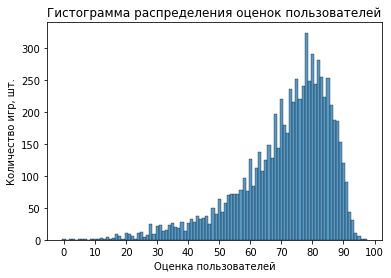

In [188]:
graph = sns.histplot(data=data, x='user_score', discrete=True)
graph.set(title='Гистограмма распределения оценок пользователей')
graph.set_xlabel('Оценка пользователей')
graph.set_ylabel('Количество игр, шт.')
graph.xaxis.set_major_locator(ticker.MultipleLocator(10))
pass

#### rating — рейтинг от организации ESRB

In [189]:
data['rating'].value_counts(dropna=False)

NaN     6766
E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

Здесь присутствуют значения NaN.<br>Видимо, не все игры получили рейтинг от организации ESRB.

Несколько рейтингов - экзотические.

In [190]:
data.query('rating in ["K-A", "RP", "EC", "AO"]')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
656,Theme Hospital,PC,1997,Strategy,2.30,0.10,0.00,0.00,<NA>,90,K-A
875,Grand Theft Auto: San Andreas,XB,2005,Action,1.26,0.61,0.00,0.09,93,86,AO
903,PaRappa The Rapper,PS,1996,Misc,0.26,0.16,1.46,0.03,92,74,K-A
4297,Nickelodeon Team Umizoomi,DS,2011,Action,0.42,0.00,0.00,0.03,<NA>,<NA>,EC
5034,Sesame Street: Elmo's A-to-Zoo Adventure,Wii,2010,Misc,0.35,0.00,0.00,0.02,<NA>,<NA>,EC
6046,Sesame Street: Cookie's Counting Carnival,Wii,2010,Misc,0.27,0.00,0.00,0.02,<NA>,<NA>,EC
6764,Dora the Explorer: Journey to the Purple Planet,PS2,2005,Adventure,0.12,0.09,0.00,0.03,<NA>,70,EC
7586,"Ni Hao, Kai-lan: New Year's Celebration",DS,2009,Misc,0.19,0.00,0.00,0.01,<NA>,<NA>,EC
9960,Dora the Explorer: Journey to the Purple Planet,GC,2005,Adventure,0.09,0.02,0.00,0.00,<NA>,<NA>,EC
13065,Sesame Street: Cookie's Counting Carnival,PC,2010,Misc,0.05,0.00,0.00,0.00,<NA>,<NA>,EC


По материалам https://ru.wikipedia.org/wiki/ESRB:


"AO" - это почти "M".<br>
"RP" - неизвестный.<br>
"K-A" - это "E".<br>
"EC" - подвид "E".<br><br>Заменим:

In [191]:
data.loc[data['rating'] == 'AO', 'rating'] = 'M'
data.loc[data['rating'] == 'RP', 'rating'] = np.NaN
data.loc[data['rating'] == 'K-A', 'rating'] = 'E'
data.loc[data['rating'] == 'EC', 'rating'] = 'E'

Также, заменим неизвестные значения рейтинга (NaN) на новую категорию "Unknown":

In [192]:
data['rating'] = data['rating'].fillna('Unknown')

In [193]:
data['rating'].value_counts(dropna=False)

Unknown    6769
E          4001
T          2961
M          1564
E10+       1420
Name: rating, dtype: int64

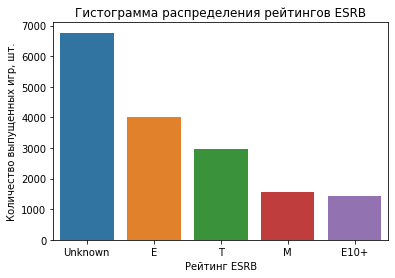

In [194]:
graph = sns.barplot(x=data['rating'].value_counts().index,
                    y=data['rating'].value_counts())
graph.set(title='Гистограмма распределения рейтингов ESRB')
graph.set_xlabel('Рейтинг ESRB')
graph.set_ylabel('Количество выпущенных игр, шт.');

#### Общая предобработка

Проверим наличие дублированных записей.

In [195]:
data.duplicated().sum()

0

##### total_sales — суммарные продажи во всех регионах

Добавим новый столбец с суммарными продажами во всех регионах:

In [196]:
data['total_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

In [197]:
data['total_sales'].describe()

count   16715.00
mean        0.53
std         1.55
min         0.00
25%         0.06
50%         0.17
75%         0.47
max        82.54
Name: total_sales, dtype: float64

In [198]:
data.query('total_sales > 0')['total_sales'].describe()

count   16713.00
mean        0.53
std         1.55
min         0.01
25%         0.06
50%         0.17
75%         0.47
max        82.54
Name: total_sales, dtype: float64

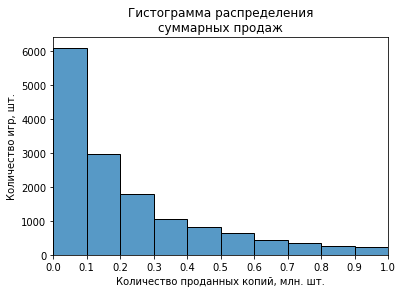

In [199]:
graph = sns.histplot(data=data.query('0 < total_sales < 1'), x='total_sales', bins=np.arange(0, 1.1, 0.1))
graph.set(title='Гистограмма распределения\nсуммарных продаж')
graph.set_xlabel('Количество проданных копий, млн. шт.')
graph.set_ylabel('Количество игр, шт.')
graph.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
graph.set_xlim(0, 1)
pass

Игры, топовые по продажам:

In [200]:
data.sort_values(by='total_sales', ascending=False).head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,80,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,<NA>,Unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,83,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,80,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,<NA>,Unknown,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,<NA>,<NA>,Unknown,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,85,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,66,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87,84,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,<NA>,<NA>,Unknown,28.31


### Исследовательский анализ данных

#### Количество выпущенных игр по годам

In [201]:
data['year_of_release'].value_counts(dropna=False).sort_index(ascending=False)

2016     502
2015     606
2014     581
2013     544
2012     653
2011    1136
2010    1255
2009    1426
2008    1427
2007    1197
2006    1006
2005     939
2004     762
2003     775
2002     829
2001     482
2000     350
1999     338
1998     379
1997     289
1996     263
1995     219
1994     121
1993      62
1992      43
1991      41
1990      16
1989      17
1988      15
1987      16
1986      21
1985      14
1984      14
1983      17
1982      36
1981      46
1980       9
NaN      269
Name: year_of_release, dtype: Int64

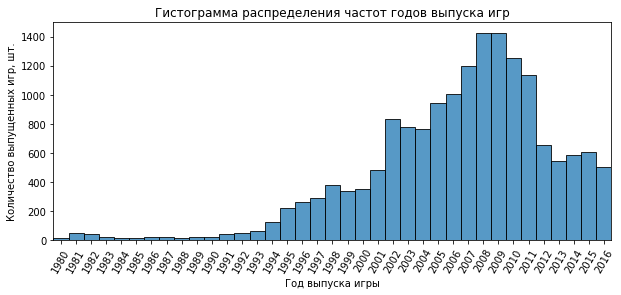

In [202]:
graph = sns.histplot(data=data, x='year_of_release', discrete=True)
graph.set(title='Гистограмма распределения частот годов выпуска игр')
graph.set_xlabel('Год выпуска игры')
graph.set_ylabel('Количество выпущенных игр, шт.')
plt.xticks(rotation=60)
graph.xaxis.set_major_locator(ticker.MultipleLocator(1))
graph.figure.set_figwidth(10)
graph.set_xlim(1980-0.5, 2016+0.5)
pass

Из графика видно, что до 1994 года продажи были несравнимо малыми.

#### Динамика продаж по платформам

Найдем платформы с наибольшими суммарными продажами:

In [203]:
data.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(10)

platform
PS2    1255.77
X360    971.42
PS3     939.65
Wii     907.51
DS      806.12
PS      730.86
GBA     317.85
PS4     314.14
PSP     294.05
PC      259.52
Name: total_sales, dtype: float64

Рассмотрим распределение по годам каждой платформы.

In [204]:
def platform_graph(df, platform, starting_year=1980):
    order=range(starting_year,2016+1)
    graph = sns.barplot(x='year_of_release', y='total_sales', estimator=sum,
                    data=df.query('year_of_release.notna() and platform==@platform'),
                    ci=None, order=order)
    graph.set(title='Динамика суммарных продаж игр на платформе ' + platform)
    graph.set_xlabel('Год выпуска игры')
    graph.set_ylabel('Продажи, млн. копий.')
    plt.xticks(rotation=60)
    graph.figure.set_figwidth(10)
    plt.show()

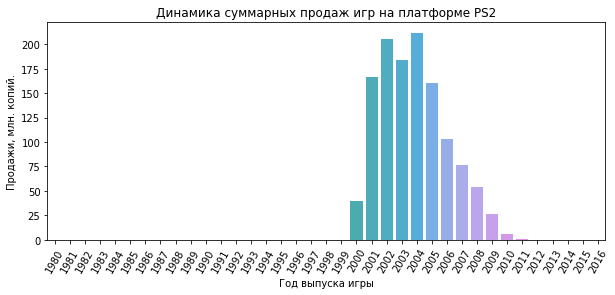

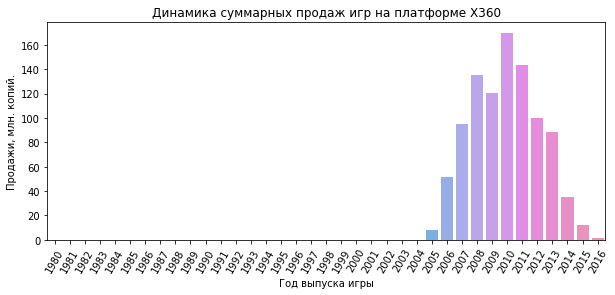

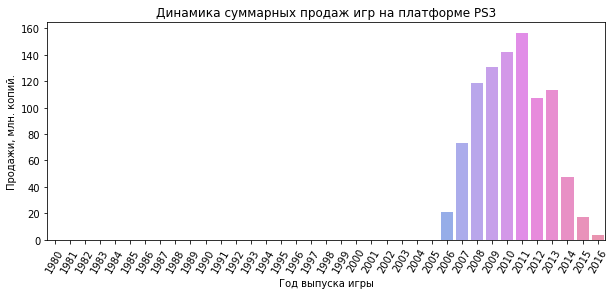

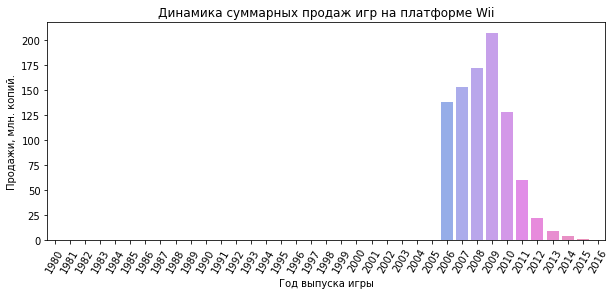

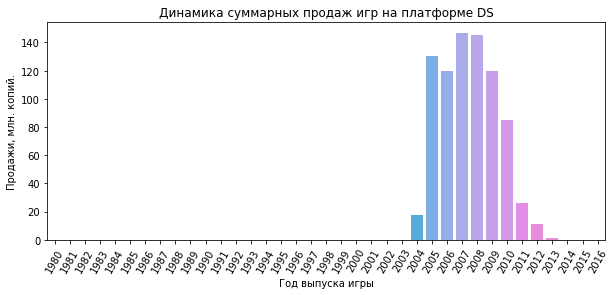

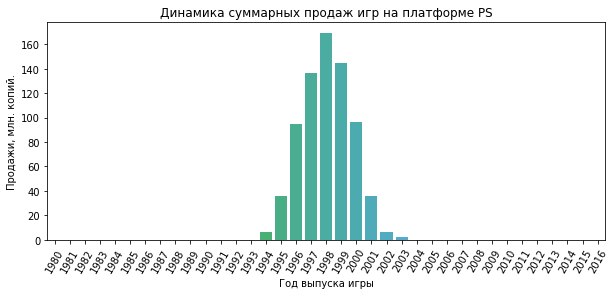

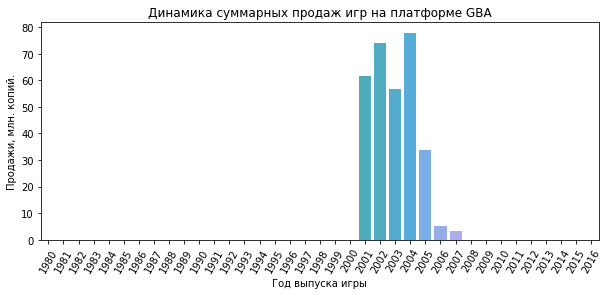

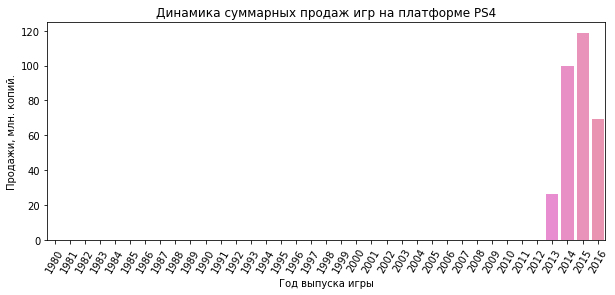

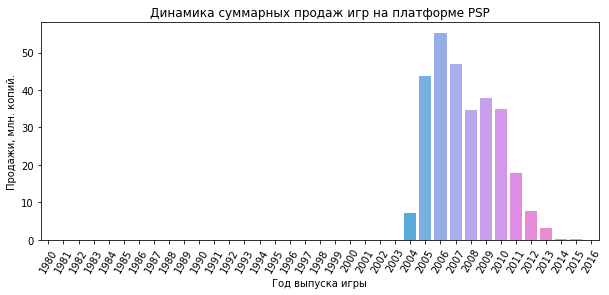

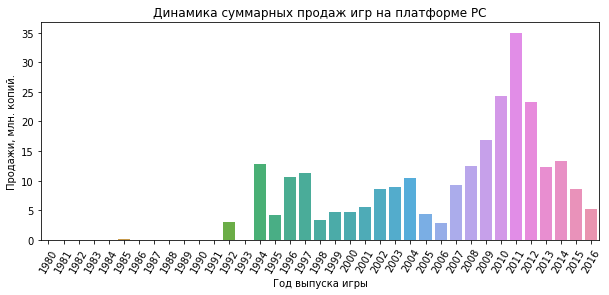

In [205]:
for i in range(0, 10):
    platform_graph(data, data.groupby('platform')['total_sales'].sum().sort_values(ascending=False).index[i])

Из графиков видно, что жизненный цикл платформ обычно находится в пределах 7-10 лет.

##### Определение актуального периода

Для определения актуального периода для составления прогноза на 2017 год, посмотрим, игры на каких платформах вообще выпускались в 2016 году:

In [206]:
data.query('year_of_release == 2016')['platform'].value_counts()

PS4     164
XOne     87
PSV      85
PC       54
3DS      46
PS3      38
WiiU     14
X360     13
Wii       1
Name: platform, dtype: int64

Остальные платформы нас уже сразу не интересуют.

In [207]:
platforms_2016 = data.query('year_of_release == 2016')['platform'].value_counts().index

data_actual = data.query('platform in @platforms_2016')

Посмотрим, какие годы остались.

In [208]:
data_actual['year_of_release'].value_counts(dropna=False).sort_index(ascending=False)

2016    502
2015    603
2014    571
2013    482
2012    524
2011    837
2010    706
2009    766
2008    642
2007    460
2006    216
2005     55
2004     30
2003     33
2002     19
2001     15
2000      7
1999      7
1998      8
1997      6
1996      4
1995      2
1994      6
1992      5
1988      1
1985      1
NaN     115
Name: year_of_release, dtype: Int64

Посмотрим, какие годы остались без платформы PC.

In [209]:
data_actual.query('platform != "PC"')['year_of_release'].value_counts(dropna=False).sort_index(ascending=False)

2016    448
2015    553
2014    524
2013    444
2012    463
2011    698
2010    616
2009    659
2008    566
2007    398
2006    164
2005     18
NaN      98
Name: year_of_release, dtype: Int64

Годы до 2005 нас не интересуют.

In [210]:
years_actual = list(range(2005,2017))

data_actual = data_actual.query('year_of_release in @years_actual')

In [211]:
data_actual.query('platform != "PC"')['year_of_release'].value_counts(dropna=False).sort_index(ascending=False)

2016    448
2015    553
2014    524
2013    444
2012    463
2011    698
2010    616
2009    659
2008    566
2007    398
2006    164
2005     18
NaN       0
Name: year_of_release, dtype: Int64

##### Динамика продаж за период 2005-2016

Посмотрим на графики продаж оставшихся платформ.

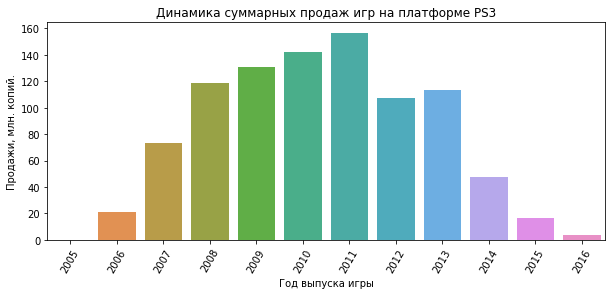

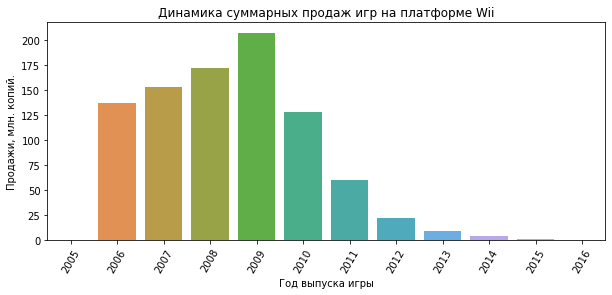

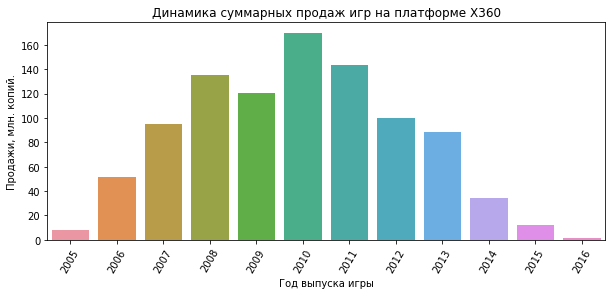

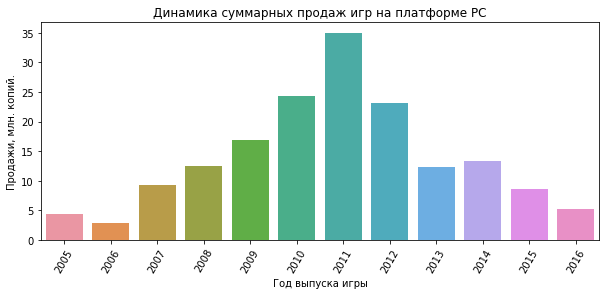

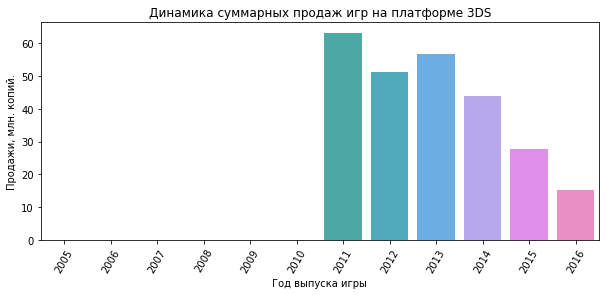

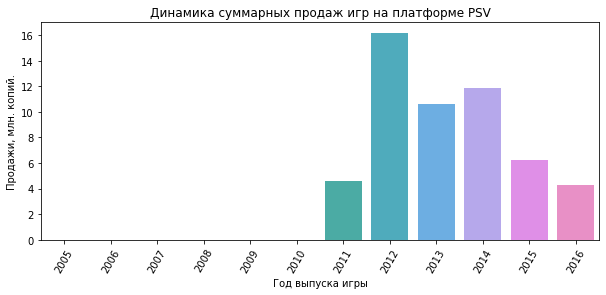

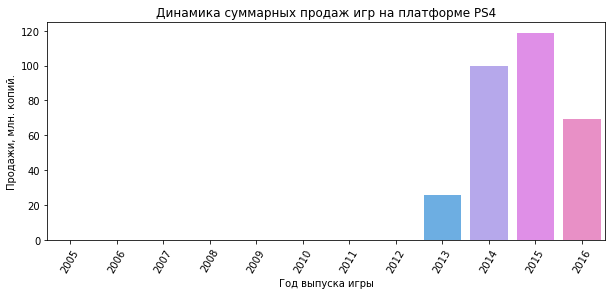

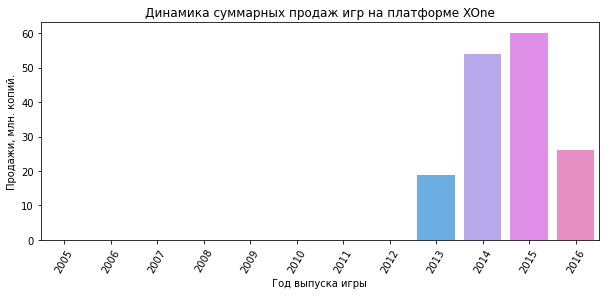

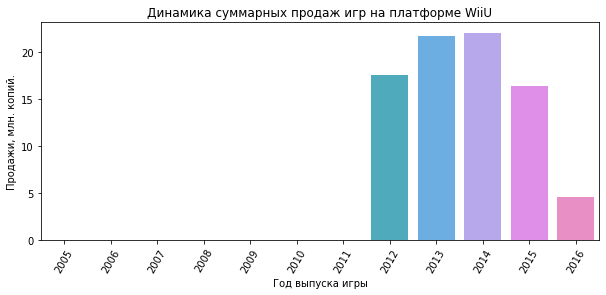

In [212]:
for platform in data_actual['platform'].value_counts().index:
    platform_graph(data_actual, platform, 2005)

Даже с учетом того, что данные за 2016 год могут быть неполными, из графиков видно, что следующие платформы находятся уже в конце своего жизненного цикла:<br>
PS3, Wii, X360.<br><br>
Уберем их из рассмотрения и повторим шаги, аналогичные предыдущим:

In [213]:
data_actual = data_actual.query('not platform in ["PS3", "Wii", "X360"]')

In [214]:
data_actual['platform'].value_counts()

PC      813
3DS     512
PSV     429
PS4     392
XOne    247
WiiU    147
Name: platform, dtype: int64

In [215]:
data_actual.query('platform != "PC"')['year_of_release'].value_counts(dropna=False).sort_index(ascending=False)

2016    396
2015    441
2014    347
2013    231
2012    178
2011    134
NaN       0
Name: year_of_release, dtype: Int64

Теперь уже годы до 2011 нас не интересуют.

##### Актуальный период (итог)

Итоговый актуальный период: 2011 - 2016.

In [216]:
years_actual = list(range(2011,2016+1))

data_actual = data_actual.query('year_of_release in @years_actual')

##### Динамика продаж в актуальном периоде

Посмотрим на общую динамику продаж за актуальные годы.

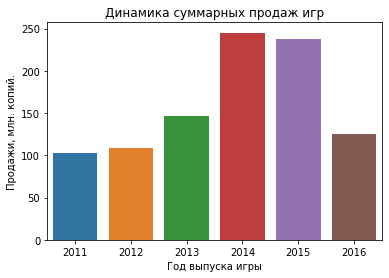

In [217]:
graph = sns.barplot(x='year_of_release', y='total_sales', estimator=sum, data=data_actual, ci=None)
graph.set(title='Динамика суммарных продаж игр')
graph.set_xlabel('Год выпуска игры')
graph.set_ylabel('Продажи, млн. копий.')
pass

Для большей наглядности графиков попытаемся сделать неполные данные за 2016 год сравнимыми.<br>Можно было бы экстраполировать негативную тенденцию 2014-2015 годов, но более адекватным представляется простое домножение на 2.

In [218]:
data_actual_fixed = data_actual.copy(deep=True)

In [219]:
data_actual_fixed.loc[data_actual_fixed['year_of_release'] == 2016, 'na_sales'] *= 2
data_actual_fixed.loc[data_actual_fixed['year_of_release'] == 2016, 'eu_sales'] *= 2
data_actual_fixed.loc[data_actual_fixed['year_of_release'] == 2016, 'jp_sales'] *= 2
data_actual_fixed.loc[data_actual_fixed['year_of_release'] == 2016, 'other_sales'] *= 2
data_actual_fixed.loc[data_actual_fixed['year_of_release'] == 2016, 'total_sales'] *= 2

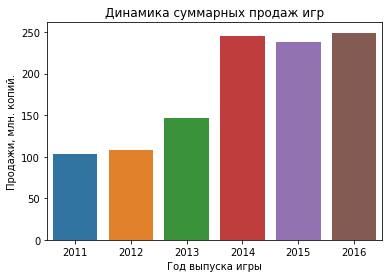

In [220]:
graph = sns.barplot(x='year_of_release', y='total_sales', estimator=sum, data=data_actual_fixed, ci=None)
graph.set(title='Динамика суммарных продаж игр')
graph.set_xlabel('Год выпуска игры')
graph.set_ylabel('Продажи, млн. копий.')
pass

График выглядит правдоподобно.

Теперь рассмотрим графики по платформам.

In [221]:
def platform_graph2(df, platform):
    order=range(2011,2016+1)
    graph = sns.barplot(x='year_of_release', y='total_sales', estimator=sum,
                    data=df.query('platform==@platform'),
                    ci=None, order=order)
    graph.set(title='Динамика суммарных продаж игр на платформе ' + platform)
    graph.set_xlabel('Год выпуска игры')
    graph.set_ylabel('Продажи, млн. копий.')
    graph.figure.set_figwidth(6.5)
    plt.show()

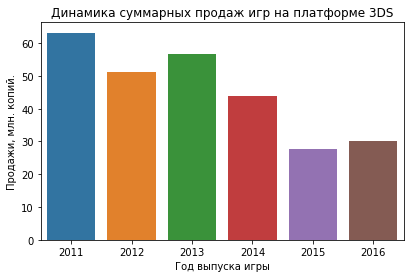

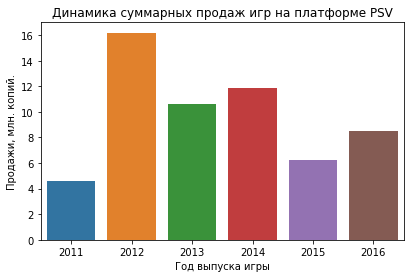

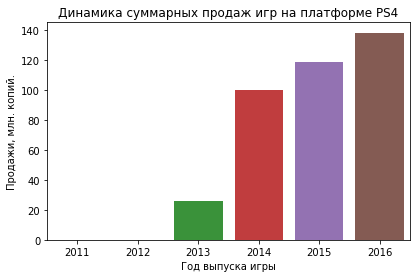

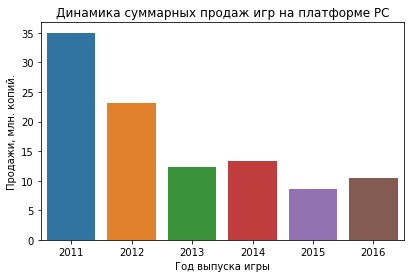

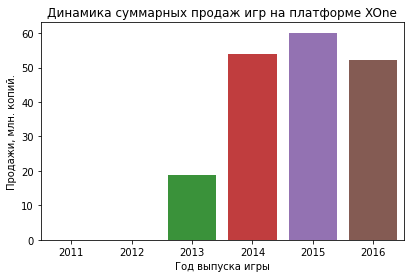

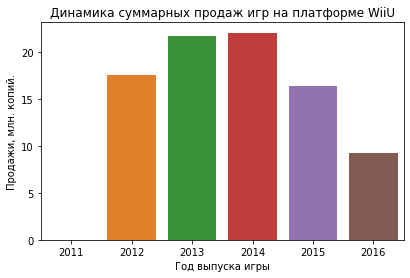

In [222]:
for platform in data_actual_fixed['platform'].value_counts().index:
    platform_graph2(data_actual_fixed, platform)

Лидирует по продажам платформа PS4. И она же находится в фазе роста.<br>
Вторая - XOne. Возможно, она прошла свой максимум в 2015 году.<br>
Платформа WiiU находится в очевидном падении.<br>
Остальные - плавно снижаются.

#### Диаграммы размаха

Построим диграммы размаха по глобальным продажам игр в разбивке по платформам.

In [223]:
def platform_graph_boxplot(df, platform):
    graph = sns.boxplot(x='total_sales',
                    data=df.query('platform==@platform'))
    graph.set(title='Диграмма размаха глобальных продаж игр на платформе ' + platform)
    graph.set_xlabel('Продажи, млн. копий.')
    graph.figure.set_figwidth(10)
    plt.show()

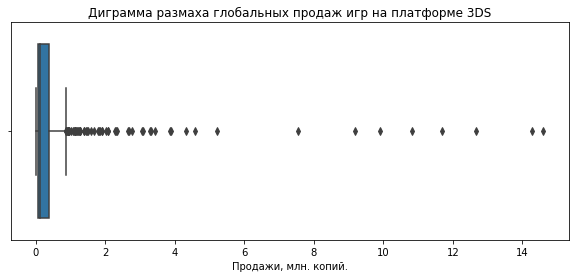

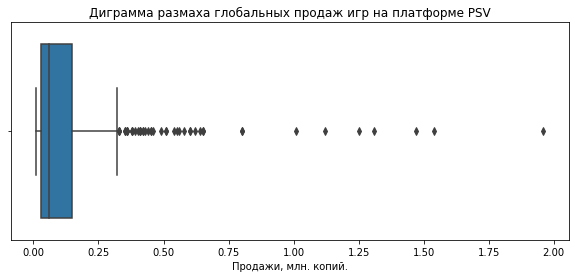

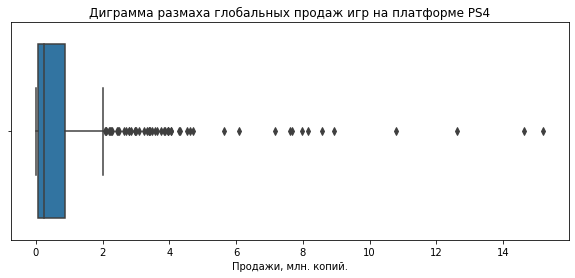

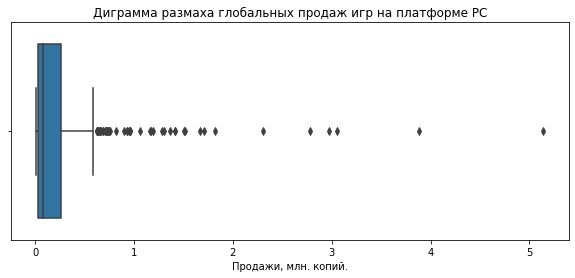

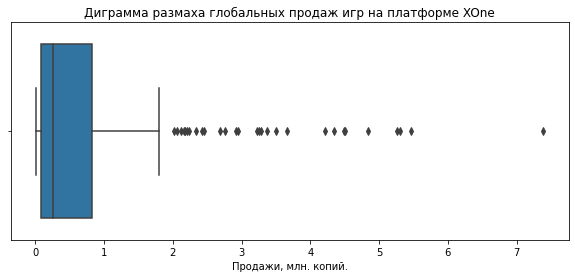

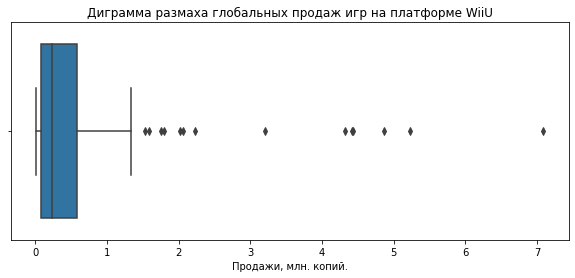

In [224]:
for platform in data_actual_fixed['platform'].value_counts().index:
    platform_graph_boxplot(data_actual_fixed, platform)

Графики схожи между собой. В каждой платформе основная часть игр имеет сравнительно незначительные продажи. И есть отдельные, гораздо более успешные игры.

Рассмотрим эти же графики в единых координатах:

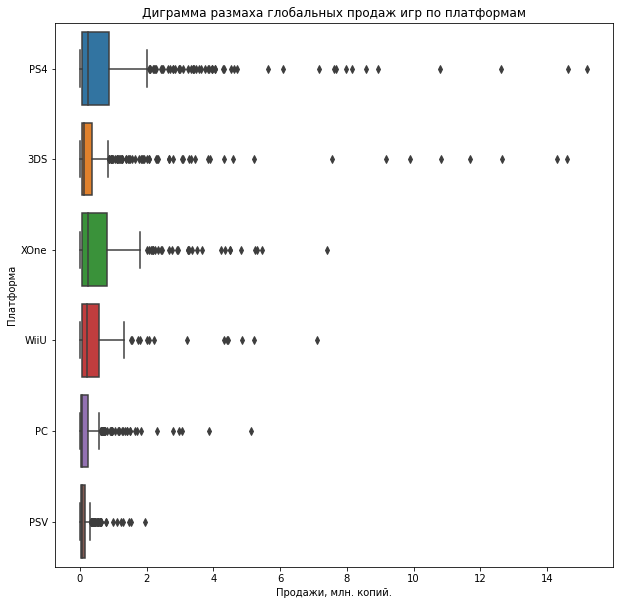

In [225]:
graph = sns.boxplot(x='total_sales', y='platform', data=data_actual_fixed)
graph.set(title='Диграмма размаха глобальных продаж игр по платформам')
graph.set_xlabel('Продажи, млн. копий.')
graph.set_ylabel('Платформа')
graph.figure.set_figwidth(10)
graph.figure.set_figheight(10)

Наиболее выдающиеся по продажам проекты были на платформах PS4 и 3DS.

Для лучшего рассмотрения основной массы игр, построим этот же график без значений-выбросов:

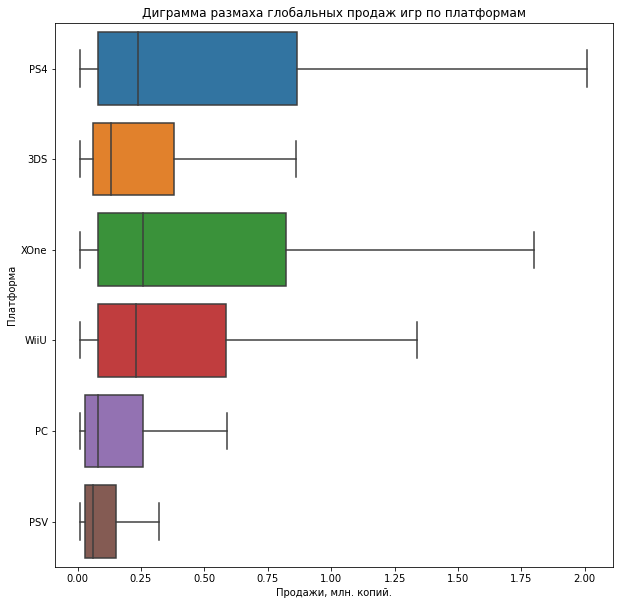

In [226]:
graph = sns.boxplot(x='total_sales', y='platform', data=data_actual_fixed, showfliers=False)
graph.set(title='Диграмма размаха глобальных продаж игр по платформам')
graph.set_xlabel('Продажи, млн. копий.')
graph.set_ylabel('Платформа')
graph.figure.set_figwidth(10)
graph.figure.set_figheight(10)

Медианные значения заметно больше у платформ PS4, XOne и WiiU.<br>
У платформ PS4 и XOne значительно больше потенциал возможной успешности игр.

#### Влияние отзывов на продажи игр на платформе PS4

In [227]:
data_actual_fixed['user_score'] = data_actual_fixed['user_score'].astype('float')
data_actual_fixed['critic_score'] = data_actual_fixed['critic_score'].astype('float')
data_actual_fixed_ps4 = data_actual_fixed.query('platform == "PS4"')

##### Влияние отзывов пользователей на продажи

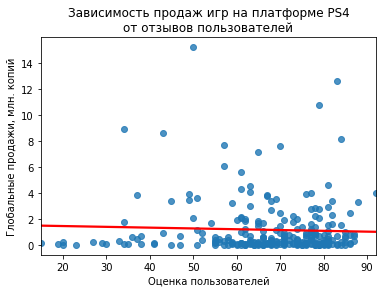

In [228]:
graph = sns.regplot(data=data_actual_fixed_ps4, x='user_score', y='total_sales',
                    ci=None, line_kws={"color": "red"})
graph.set(title='Зависимость продаж игр на платформе PS4\nот отзывов пользователей')
graph.set_xlabel('Оценка пользователей')
graph.set_ylabel('Глобальные продажи, млн. копий')
pass

Посчитаем корреляцию:

In [229]:
data_actual_fixed_ps4['total_sales'].corr(data_actual_fixed_ps4['user_score'])

-0.04378442209981069

Влияния отзывов пользователей на продажи не наблюдается.

##### Влияние отзывов критиков на продажи

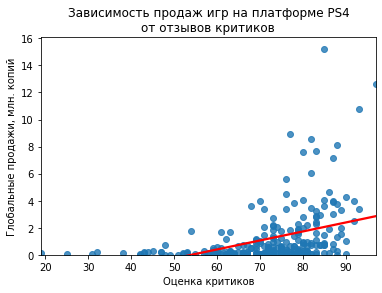

In [230]:
graph = sns.regplot(data=data_actual_fixed_ps4, x='critic_score', y='total_sales',
                    ci=None, line_kws={"color": "red"})
graph.set(title='Зависимость продаж игр на платформе PS4\nот отзывов критиков')
graph.set_xlabel('Оценка критиков')
graph.set_ylabel('Глобальные продажи, млн. копий')
graph.set(ylim=(0, None))
pass

Посчитаем корреляцию:

In [231]:
data_actual_fixed_ps4['total_sales'].corr(data_actual_fixed_ps4['critic_score'])

0.4024622329000577

0.4 - такая корреляция считается "слабой".<br>
Тем не менее, положительная зависимость между отзывами критиков и продажами присутствует.

#### Влияние отзывов на продажи игр на различных платформах

Рассмотрим, повторяются ли выявленные закономерности для PS4 на других платформах.<br>
Для этого рассчитаем соответствующие коэффициенты корреляция отдельно для каждой платформы.

In [232]:
def platform_score_corr(df, platform):
    user_corr = df.query('platform == @platform')['user_score'].corr(df.query('platform == @platform')['total_sales'])
    critic_corr = df.query('platform == @platform')['critic_score'].corr(df.query('platform == @platform')['total_sales'])
    print(platform, '\t', round(user_corr, 2), '\t', round(critic_corr, 2))

In [233]:
print('Платф.\tПольз.\tКрит.')
for platform in data_actual_fixed['platform'].value_counts().index:
    platform_score_corr(data_actual_fixed, platform)

Платф.	Польз.	Крит.
3DS 	 0.23 	 0.35
PSV 	 0.02 	 0.14
PS4 	 -0.04 	 0.4
PC 	 -0.05 	 0.32
XOne 	 -0.08 	 0.44
WiiU 	 0.41 	 0.36


На других платформах наблюдается другая ситуация.<br>
Присутствует зависимость между продажами и оценками пользователей на следующих платформах:
* 3DS (очень слабая зависимость)
* WiiU (слабая зависимость)

Зависимость между продажами и оценками критиков наблюдается на всех платформах (слабая).<br>
Но на PSV - очень слабая.

Рассмотрим выявленные зависимости на диаграммах:

##### Влияние отзывов пользователей на продажи (диаграммы)

In [234]:
def platform_graph_user_score(platform):
    graph = sns.regplot(data=data_actual_fixed.query('platform == @platform'),
                        x='user_score', y='total_sales',
                        ci=None, line_kws={"color": "red"})
    graph.set(title='Зависимость продаж игр на платформе ' + platform + '\nот отзывов пользователей')
    graph.set_xlabel('Оценка пользователей')
    graph.set_ylabel('Глобальные продажи, млн. копий')
    graph.set(ylim=(0, None))
    plt.show()

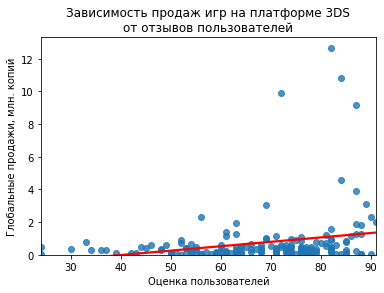

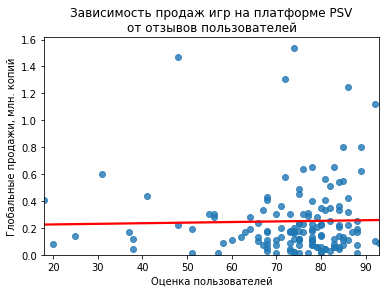

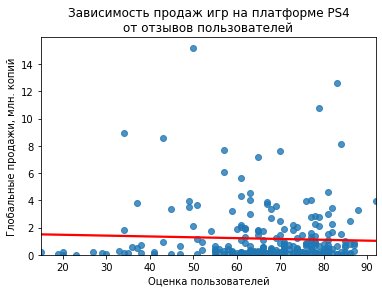

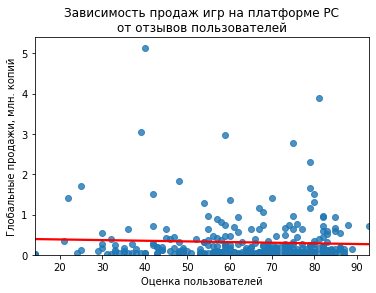

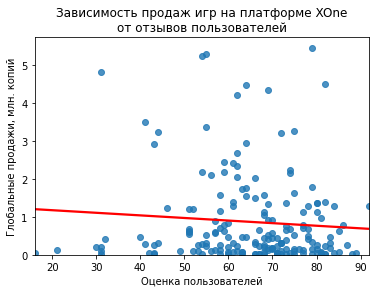

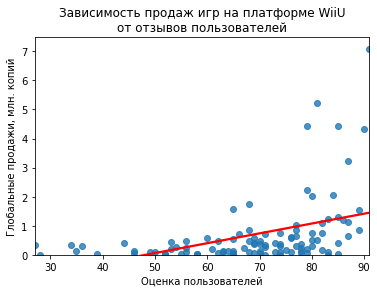

In [235]:
for platform in data_actual_fixed['platform'].value_counts().index:
    platform_graph_user_score(platform)

##### Влияние отзывов критиков на продажи (диаграммы)

In [236]:
def platform_graph_critic_score(platform):
    graph = sns.regplot(data=data_actual_fixed.query('platform == @platform'),
                        x='critic_score', y='total_sales',
                        ci=None, line_kws={"color": "red"})
    graph.set(title='Зависимость продаж игр на платформе ' + platform + '\nот отзывов критиков')
    graph.set_xlabel('Оценка критиков')
    graph.set_ylabel('Глобальные продажи, млн. копий')
    graph.set(ylim=(0, None))
    plt.show()

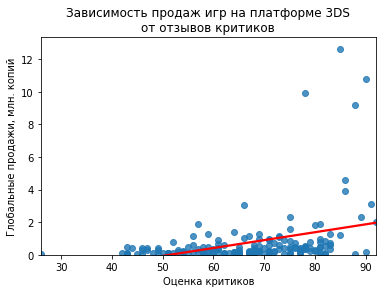

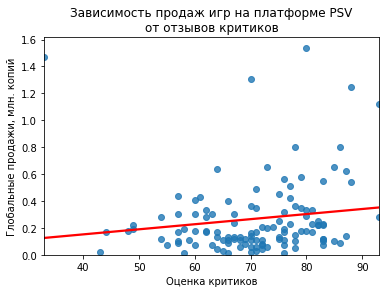

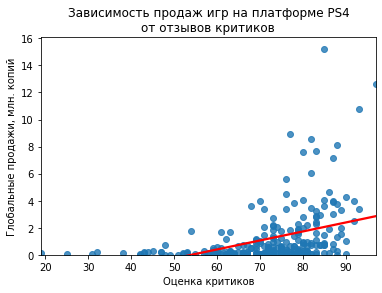

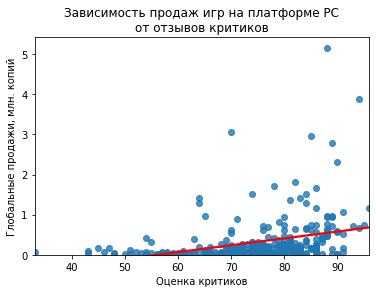

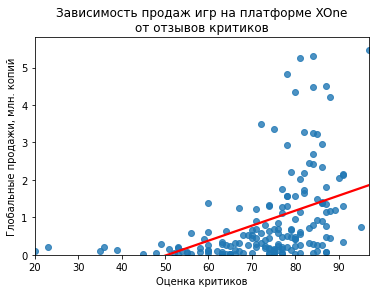

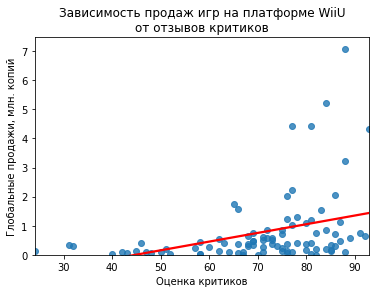

In [237]:
for platform in data_actual_fixed['platform'].value_counts().index:
    platform_graph_critic_score(platform)

#### Распределение игр по жанрам

In [238]:
data_actual['genre'].value_counts(dropna=False)

Action          717
Role-Playing    284
Adventure       204
Sports          164
Shooter         162
Misc            146
Racing           92
Simulation       87
Strategy         80
Platform         77
Fighting         63
Puzzle           40
Name: genre, dtype: int64

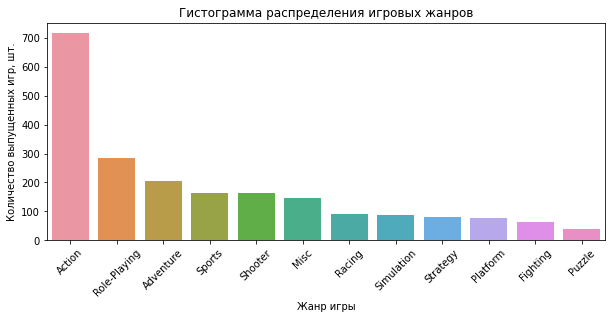

In [239]:
graph = sns.barplot(x=data_actual['genre'].value_counts().index,
                    y=data_actual['genre'].value_counts())
graph.set(title='Гистограмма распределения игровых жанров')
graph.set_xlabel('Жанр игры')
graph.set_ylabel('Количество выпущенных игр, шт.')
plt.xticks(rotation=45)
graph.figure.set_figwidth(10)

В актуальном периоде больше всего игр выпускается в жанре Action.

Рассмотрим количество продаж по жанрам.

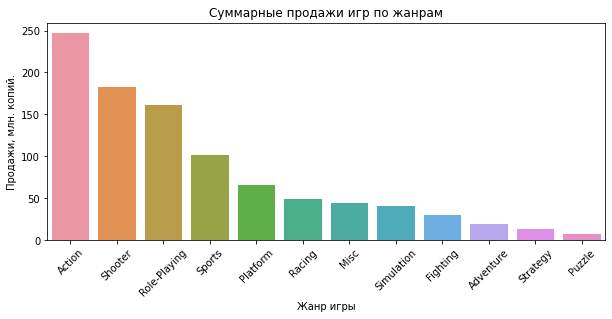

In [240]:
order = data_actual.groupby(["genre"])["total_sales"].sum().sort_values(ascending=False).index
graph = sns.barplot(x='genre', y='total_sales', estimator=sum, data=data_actual, ci=None, order=order)
graph.set(title='Суммарные продажи игр по жанрам')
graph.set_xlabel('Жанр игры')
graph.set_ylabel('Продажи, млн. копий.')
plt.xticks(rotation=45)
graph.figure.set_figwidth(10)

По суммарным продажам - так же в лидерах Action.

Рассмотрим медианное число продаж в каждом жанре.

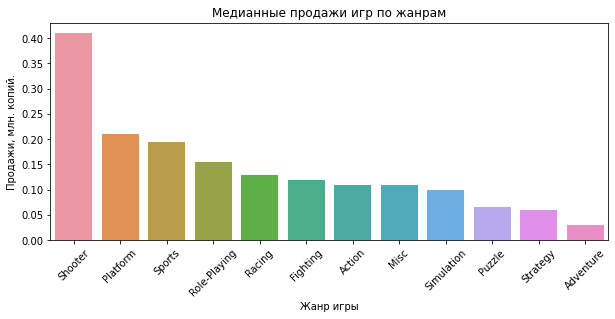

In [241]:
order = data_actual.groupby(["genre"])["total_sales"].median().sort_values(ascending=False).index
graph = sns.barplot(x='genre', y='total_sales', estimator=np.median, data=data_actual, ci=None, order=order)
graph.set(title='Медианные продажи игр по жанрам')
graph.set_xlabel('Жанр игры')
graph.set_ylabel('Продажи, млн. копий.')
plt.xticks(rotation=45)
graph.figure.set_figwidth(10)

Здесь наибольший показатель у жанра Shooter.<br>
Также высокие значения у Platform и Sports.<br>
Наименьшие медианные продажи - у жанров Puzzle, Strategy и Adventure.

Дополнительно, рассмотрим динамику продаж в жанре Shooter по годам.

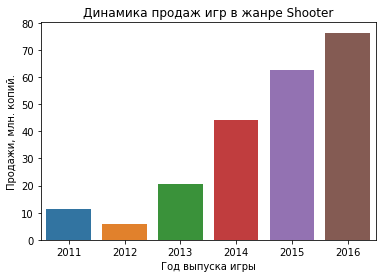

In [242]:
graph = sns.barplot(x='year_of_release', y='total_sales', estimator=sum, ci=None,
                    data=data_actual_fixed.query('genre == "Shooter"'))
graph.set(title='Динамика продаж игр в жанре Shooter')
graph.set_xlabel('Год выпуска игры')
graph.set_ylabel('Продажи, млн. копий.')
pass

Рассмотрим динамику продаж в жанре Action по годам.

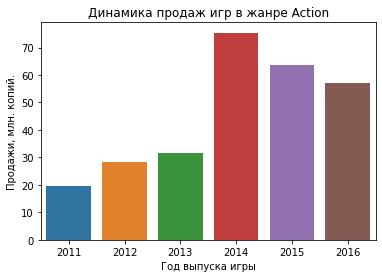

In [243]:
graph = sns.barplot(x='year_of_release', y='total_sales', estimator=sum, ci=None,
                    data=data_actual_fixed.query('genre == "Action"'))
graph.set(title='Динамика продаж игр в жанре Action')
graph.set_xlabel('Год выпуска игры')
graph.set_ylabel('Продажи, млн. копий.')
pass

Рассмотрим динамику продаж в жанре Shooter по годам на платформе PS4.

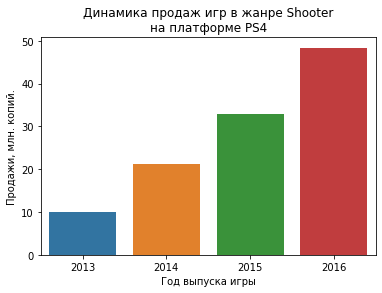

In [244]:
graph = sns.barplot(x='year_of_release', y='total_sales', estimator=sum, ci=None,
                    data=data_actual_fixed.query('genre == "Shooter" and platform == "PS4"'))
graph.set(title='Динамика продаж игр в жанре Shooter\nна платформе PS4')
graph.set_xlabel('Год выпуска игры')
graph.set_ylabel('Продажи, млн. копий.')
pass

#### Выводы

**Платформа**<br>
Наиболее перспективной выглядит платформа PS4.<br>На втором месте - XOne.<br><br>
**Жанр**<br>
Больше всего продаж у жанра Action, но динамика негативная, а медианные продажи малы.<br>
Медианные продажи максимальны у жанра Shooter. За ним следуют жанры Platform и Sports.<br><br>
**Итог**<br>
У сочетания PS4 и Shooter хорошая динамика продаж, этот вариант представляется оптимальным для продвижения.

### Портрет пользователя каждого региона

Добавим вспомогательную функцию для расчета долей по платформам и жанрам относительно общих продаж по соответствующему региону:

In [245]:
def region_stat(region_sales, indicator, limit=5):
    return (data_actual.groupby(indicator)[region_sales].sum().sort_values(ascending=False).head(limit)/ \
        data_actual[region_sales].sum() * 100).round().astype(int)

А влияние рейтинга ESRB будем рассчитывать как отношение доли продаж игр конкретного рейтинга в регионе к общей доле продаж данного региона.

In [246]:
def region_esrb(region_sales):
    return ((data_actual.groupby('rating')[region_sales].sum() / data_actual.groupby('rating')['total_sales'].sum() / \
        (data_actual.query('rating.notna()')[region_sales].sum() / data_actual.query('rating.notna()')['total_sales'].sum()) -1 ) * 100) \
        .sort_values(ascending=False)

#### Портрет пользователя региона NA

##### Платформы

Самые популярные платформы и доли их продаж (%):

In [247]:
region_stat('na_sales', 'platform')

platform
PS4     30
XOne    26
3DS     23
WiiU    10
PC       8
Name: na_sales, dtype: int64

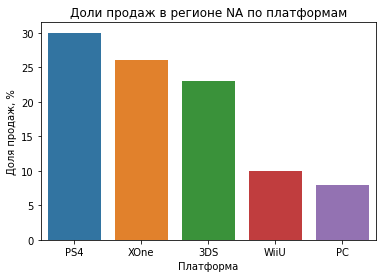

In [248]:
graph = sns.barplot(x=region_stat('na_sales', 'platform').index,
                    y=region_stat('na_sales', 'platform'), ci=None)
graph.set(title='Доли продаж в регионе NA по платформам')
graph.set_xlabel('Платформа')
graph.set_ylabel('Доля продаж, %')
pass

Лидером по продажам является платформа PS4 (30% по количеству проданных копий).<br>
Далее следуют XOne (26%) и 3DS (23%).

##### Жанры

Самые популярные жанры и доли их продаж (%):

In [249]:
region_stat('na_sales', 'genre')

genre
Action          26
Shooter         22
Role-Playing    14
Sports          11
Platform         7
Name: na_sales, dtype: int64

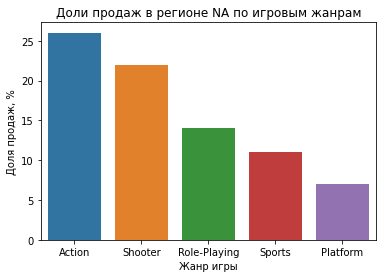

In [250]:
graph = sns.barplot(x=region_stat('na_sales', 'genre').index,
                    y=region_stat('na_sales', 'genre'), ci=None)
graph.set(title='Доли продаж в регионе NA по игровым жанрам')
graph.set_xlabel('Жанр игры')
graph.set_ylabel('Доля продаж, %')
pass

Наиболее популярны жанры Action (26% по количеству проданных копий) и Shooter (22%).

##### Рейтинг ESRB

Влияние рейтинга ESRB на продажи (в процентах):

In [251]:
region_esrb('na_sales')

rating
E10+       22.66
M          10.39
T           2.91
E           0.68
Unknown   -20.83
dtype: float64

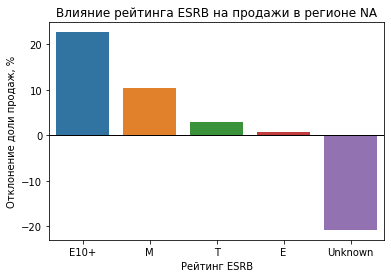

In [252]:
graph = sns.barplot(x=region_esrb('na_sales').index,
                    y=region_esrb('na_sales'), ci=None)
graph.set(title='Влияние рейтинга ESRB на продажи в регионе NA')
graph.set_xlabel('Рейтинг ESRB')
graph.set_ylabel('Отклонение доли продаж, %')
graph.axhline(0, color='k', linewidth=1)
pass

Наиболее популярны игры рейтинга "E10+", наименее - игры без рейтинга.

#### Портрет пользователя региона EU

##### Платформы

Самые популярные платформы и доли их продаж (%):

In [253]:
region_stat('eu_sales', 'platform')

platform
PS4     40
3DS     18
PC      16
XOne    15
WiiU     7
Name: eu_sales, dtype: int64

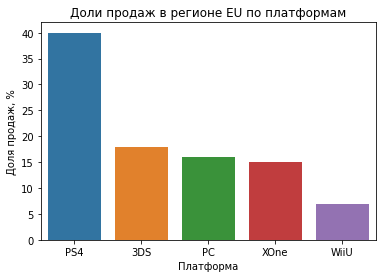

In [254]:
graph = sns.barplot(x=region_stat('eu_sales', 'platform').index,
                    y=region_stat('eu_sales', 'platform'), ci=None)
graph.set(title='Доли продаж в регионе EU по платформам')
graph.set_xlabel('Платформа')
graph.set_ylabel('Доля продаж, %')
pass

Доминирующие позиции по продажам занимает платформа PS4 (40% по количеству проданных копий).

##### Жанры

Самые популярные жанры и доли их продаж (%):

In [255]:
region_stat('eu_sales', 'genre')

genre
Action          26
Shooter         21
Sports          13
Role-Playing    12
Platform         6
Name: eu_sales, dtype: int64

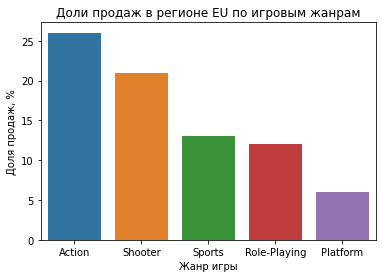

In [256]:
graph = sns.barplot(x=region_stat('eu_sales', 'genre').index,
                    y=region_stat('eu_sales', 'genre'), ci=None)
graph.set(title='Доли продаж в регионе EU по игровым жанрам')
graph.set_xlabel('Жанр игры')
graph.set_ylabel('Доля продаж, %')
pass

Наиболее популярны жанры Action (26% по количеству проданных копий) и Shooter (21%).

##### Рейтинг ESRB

Влияние рейтинга ESRB на продажи (в процентах):

In [257]:
region_esrb('eu_sales')

rating
M          16.46
E           6.01
T           0.37
E10+       -3.58
Unknown   -20.52
dtype: float64

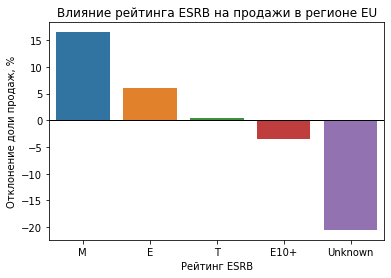

In [258]:
graph = sns.barplot(x=region_esrb('eu_sales').index,
                    y=region_esrb('eu_sales'), ci=None)
graph.set(title='Влияние рейтинга ESRB на продажи в регионе EU')
graph.set_xlabel('Рейтинг ESRB')
graph.set_ylabel('Отклонение доли продаж, %')
graph.axhline(0, color='k', linewidth=1)
pass

Наиболее популярны игры рейтинга "M", наименее - игры без рейтинга.

#### Портрет пользователя региона JP

##### Платформы

Самые популярные платформы и доли их продаж (%):

In [259]:
region_stat('jp_sales', 'platform')

platform
3DS     66
PSV     14
PS4     11
WiiU     9
XOne     0
Name: jp_sales, dtype: int64

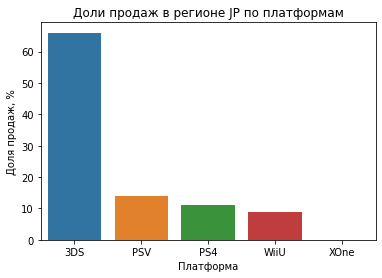

In [260]:
graph = sns.barplot(x=region_stat('jp_sales', 'platform').index,
                    y=region_stat('jp_sales', 'platform'), ci=None)
graph.set(title='Доли продаж в регионе JP по платформам')
graph.set_xlabel('Платформа')
graph.set_ylabel('Доля продаж, %')
pass

Доминирующие позиции по продажам занимает платформа 3DS (66% по количеству проданных копий).

##### Жанры

Самые популярные жанры и доли их продаж (%):

In [261]:
region_stat('jp_sales', 'genre')

genre
Role-Playing    36
Action          24
Platform         7
Misc             7
Simulation       7
Name: jp_sales, dtype: int64

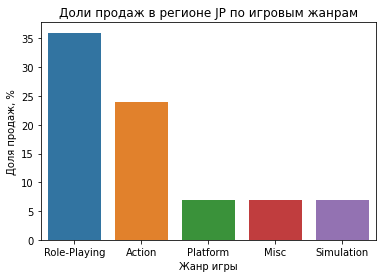

In [262]:
graph = sns.barplot(x=region_stat('jp_sales', 'genre').index,
                    y=region_stat('jp_sales', 'genre'), ci=None)
graph.set(title='Доли продаж в регионе JP по игровым жанрам')
graph.set_xlabel('Жанр игры')
graph.set_ylabel('Доля продаж, %')
pass

Наиболее популярны жанры Role-Playing (36% по количеству проданных копий) и Action (24%).

##### Рейтинг ESRB

Влияние рейтинга ESRB на продажи (в процентах):

In [263]:
region_esrb('jp_sales')

rating
Unknown   112.21
E         -11.20
T         -14.67
E10+      -45.33
M         -78.05
dtype: float64

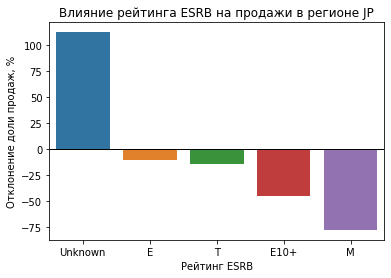

In [264]:
graph = sns.barplot(x=region_esrb('jp_sales').index,
                    y=region_esrb('jp_sales'), ci=None)
graph.set(title='Влияние рейтинга ESRB на продажи в регионе JP')
graph.set_xlabel('Рейтинг ESRB')
graph.set_ylabel('Отклонение доли продаж, %')
graph.axhline(0, color='k', linewidth=1)
pass

В регионе JP рейтинг ESRB значительно влияет на продажи.<br>
Наиболее популярны игры без рейтинга, наименее - с рейтингами "M" и "E10+".

#### Выводы

Регион NA:
* Лидером по продажам является платформа PS4 (30% по количеству проданных копий).<br>
Далее следуют XOne (26%) и 3DS (23%).
* Наиболее популярны жанры Action (26% по количеству проданных копий) и Shooter (22%).
* Наиболее популярны игры рейтинга "E10+", наименее - игры без рейтинга.

Регион EU:
* Доминирующие позиции по продажам занимает платформа PS4 (40% по количеству проданных копий).
* Наиболее популярны жанры Action (26% по количеству проданных копий) и Shooter (21%).
* Наиболее популярны игры рейтинга "M", наименее - игры без рейтинга.

Регион JP:
* Доминирующие позиции по продажам занимает платформа 3DS (66% по количеству проданных копий).
* Наиболее популярны жанры Role-Playing (36% по количеству проданных копий) и Action (24%).
* В регионе JP рейтинг ESRB значительно влияет на продажи.<br>
Наиболее популярны игры без рейтинга, наименее - с рейтингами "M" и "E10+".

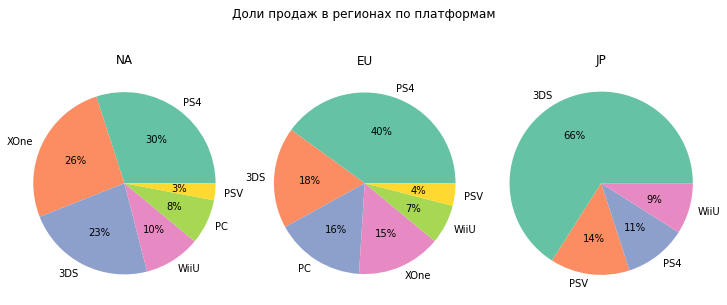

In [265]:
colors = sns.color_palette('Set2')
plt.subplots(1, 3, figsize=(10,5), constrained_layout=True)
plt.suptitle('Доли продаж в регионах по платформам')
plt.subplot(1, 3, 1)
plt.pie(region_stat('na_sales', 'platform', 99),
                labels=region_stat('na_sales', 'platform', 99).index,
                autopct='%.0f%%', colors=colors)
plt.title('NA')
plt.subplot(1, 3, 2)
plt.pie(region_stat('eu_sales', 'platform', 99),
                labels=region_stat('eu_sales', 'platform', 99).index,
                autopct='%.0f%%', colors=colors)
plt.title('EU')
plt.subplot(1, 3, 3)
plt.pie(region_stat('jp_sales', 'platform', 4),
                labels=region_stat('jp_sales', 'platform', 4).index,
                autopct='%.0f%%', colors=colors)
plt.title('JP')
plt.show();

### Проверка гипотез

#### Средние пользовательские рейтинги платформ Xbox One и PC

In [266]:
alpha = 0.01
sample_1 = data_actual_fixed.query('platform == "XOne" and user_score.notna()')['user_score']
sample_2 = data_actual_fixed.query('platform == "PC" and user_score.notna()')['user_score']
print(sample_1.mean())
print(sample_2.mean())

65.21428571428571
64.51791530944625


Нулевая гипотеза: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.<br>
Альтернативная гипотеза: средние пользовательские рейтинги платформ Xbox One и PC различающиеся.

In [267]:
print(sample_1.count())
print(sample_2.count())

182
307


* Генеральные совокупности не зависят друг от друга.
* Выборки достаточно велики, но значительно различаются по размеру.

Применим t-тест с параметром equal_var = False, предполагая, что данные в датасете являются выборкой из некоей большей генеральной совокупности.

In [268]:

results = st.ttest_ind(sample_1, sample_2, equal_var=False)
print(results.pvalue)
print(results.pvalue < alpha)

0.613071224763855
False


P-value больше порогового, нулевая гипотеза не отвергается.<br>
Нельзя утверждать, что средние пользовательские рейтинги платформ Xbox One и PC различаются.

#### Средние пользовательские рейтинги жанров Action и Sports

In [269]:
alpha = 0.01
sample_1 = data_actual_fixed.query('genre == "Action" and user_score.notna()')['user_score']
sample_2 = data_actual_fixed.query('genre == "Sports" and user_score.notna()')['user_score']
print(sample_1.mean())
print(sample_2.mean())

68.27055702917772
57.175


Нулевая гипотеза: средние пользовательские рейтинги жанров Action и Sports одинаковые.<br>Альтернативная гипотеза: средние пользовательские рейтинги жанров Action и Sports различающиеся.

In [270]:
print(sample_1.count())
print(sample_2.count())

377
120


* Генеральные совокупности не зависят друг от друга.
* Выборки достаточно велики, но значительно различаются по размеру.

Применим t-тест с параметром equal_var = False, предполагая, что данные в датасете являются выборкой из некоей большей генеральной совокупности.

In [271]:
results = st.ttest_ind(sample_1, sample_2, equal_var=False)
print(results.pvalue)
print(results.pvalue < alpha)

1.8972540670912893e-10
True


P-value меньше порогового, нулевая гипотеза отвергается.<br>
Средние пользовательские рейтинги жанров Action и Sports различаются.

#### Выводы

* Нельзя утверждать, что средние пользовательские рейтинги платформ Xbox One и PC различаются.
* Средние пользовательские рейтинги жанров Action и Sports различаются. У Action рейтинги выше.

### Общие выводы

**Выбор продукта для продвижения**
* **Платформа**<br>
Наиболее перспективной выглядит платформа PS4.<br>На втором месте - XOne.<br><br>
* **Жанр**<br>
Больше всего продаж у жанра Action, но динамика негативная, а медианные продажи малы.<br>
Медианные продажи максимальны у жанра Shooter. За ним следуют жанры Platform и Sports.<br><br>
* **Итог**<br>
У сочетания PS4 и Shooter хорошая динамика продаж, этот вариант представляется оптимальным для продвижения.

<br>

**Портреты пользователей по регионам**
* **Регион NA**
 * Лидером по продажам является платформа PS4 (30% по количеству проданных копий).<br>
Далее следуют XOne (26%) и 3DS (23%).
 * Наиболее популярны жанры Action (26% по количеству проданных копий) и Shooter (22%).
 * Наиболее популярны игры рейтинга "E10+", наименее - игры без рейтинга.

* **Регион EU**
 * Доминирующие позиции по продажам занимает платформа PS4 (40% по количеству проданных копий).
 * Наиболее популярны жанры Action (26% по количеству проданных копий) и Shooter (21%).
 * Наиболее популярны игры рейтинга "M", наименее - игры без рейтинга.

* **Регион JP**
 * Доминирующие позиции по продажам занимает платформа 3DS (66% по количеству проданных копий).
 * Наиболее популярны жанры Role-Playing (36% по количеству проданных копий) и Action (24%).
 * В регионе JP рейтинг ESRB значительно влияет на продажи.<br>
Наиболее популярны игры без рейтинга, наименее - с рейтингами "M" и "E10+".

<br>

**Проверка гипотез**
* Нельзя утверждать, что средние пользовательские рейтинги платформ Xbox One и PC различаются.
* Средние пользовательские рейтинги жанров Action и Sports различаются. У Action рейтинги выше.